In [1]:
# setting up the Environment:
# To read data and numerical calculation:
import numpy as np
import pandas as pd
import os
#import splitfolders


#Graph plotting libaries:
import matplotlib.pyplot as plt
import seaborn as sns

#Image viewing libaries:
import cv2
import glob
from PIL import Image

# Tensorflow libaries:
import tensorflow
import keras

# Image preprocessing libaries:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Alexnet Model Archiecture:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [2]:
path=r'C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Raw_Dataset\Raw Datasets'
#os.chdir(path)
training_dir=os.listdir(path)
print("number of classes:",len(os.listdir(path)))
print(os.listdir(path))

number of classes: 5
['cerebrovascular brain', 'Degenerative disease', 'Inflammatory Disease', 'Neoplastic Disease', 'Normal brain']


In [3]:
train_datagen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=[0, 0.1],horizontal_flip=True,shear_range=0.02,height_shift_range=[0, 0.1],fill_mode='nearest')
valid_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset=train_datagen.flow_from_directory(directory=r'C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Data augumented  & vgg-16\Data augumented\train', target_size=(224,224),batch_size=16,shuffle=True,subset='training',color_mode='rgb',class_mode='categorical',seed=21)
valid_dataset=valid_datagen.flow_from_directory(directory=r'C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Data augumented  & vgg-16\Data augumented\val', target_size=(224,224),batch_size=16,shuffle=True,color_mode='rgb',class_mode='categorical',seed=21)
test_dataset=test_datagen.flow_from_directory(directory=r'C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Data augumented  & vgg-16\Data augumented\test', target_size=(224,224),batch_size=1,shuffle=False,class_mode=None,seed=21)


Found 3936 images belonging to 5 classes.
Found 490 images belonging to 5 classes.
Found 496 images belonging to 5 classes.


In [5]:
AlexNet = Sequential()

In [6]:
#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

In [7]:
#Output Layer
AlexNet.add(Dense(5))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

In [8]:
#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 96)       384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 256)      1

In [9]:
opt = Adam(learning_rate=1e-5)

AlexNet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# batch_size=16

# history=AlexNet.fit(train_dataset,steps_per_epoch=train_dataset.n//batch_size,validation_data=valid_dataset,validation_steps=valid_dataset.n//batch_size, epochs=50)

In [11]:
#AlexNet.save(r'/content/drive/MyDrive/Save_model/alexnet.h5')

In [12]:
# plt.subplot(211)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model_accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('epoch')
# plt.legend(['train','val'],loc='upper left')

# plt.subplot(212)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# #plt.title('Base_model_accuracy')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train','val'],loc='upper left')
# plt.show()

In [13]:
AlexNet = load_model(r'C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\ResNet-50 & AlexNet\Models\alexnet_real.h5')

In [14]:
model_new=AlexNet
accuracy_score = model_new.evaluate(train_dataset)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
print("Loss: ",accuracy_score[0])

246/246 [==============================] - 173s 701ms/step - loss: 0.3114 - accuracy: 0.9606
[0.31144899129867554, 0.9606199264526367]
Accuracy: 96.0620%
Loss:  0.31144899129867554


In [15]:
accuracy_score = model_new.evaluate(valid_dataset)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
 
print("Loss: ",accuracy_score[0])

31/31 [==============================] - 12s 402ms/step - loss: 0.3491 - accuracy: 0.9469
[0.3491383492946625, 0.9469387531280518]
Accuracy: 94.6939%
Loss:  0.3491383492946625


In [16]:
predictions_model=[]
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
test_labels=test_dataset.classes
for i in range(0,test_dataset.n):
    predictions=model_new.predict(test_dataset[i])
    predictions=np.argmax(predictions)
    predictions_model.append(predictions)
#rint(predictions,np.argmax(predictions))
#=np.argmax(predictions);
#redictions_model.append(s)
print(classification_report(test_labels,predictions_model))

1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 175ms/step


1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 99ms/step
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        82
           1       0.86      0.99      0.92        69
           2       0.95      0.97      0.96        58
           3       1.00      1.00      1.00       172
           4       1.00      0.79      0.88       115

    accuracy                           0.95       496
   macro avg       0.93      0.95      0.94       496
weighted avg       0.95      0.95      0.94       496



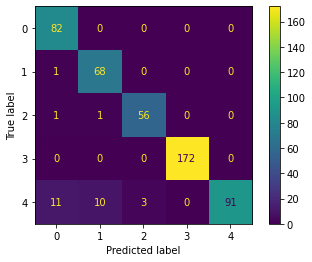

In [17]:
confusion_matrix(test_labels,predictions_model)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_labels,predictions_model),display_labels=np.unique(test_dataset.classes))
cm_display.plot()
plt.show()

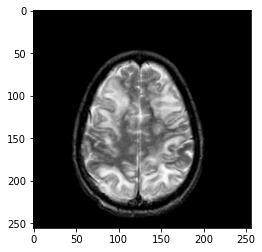

In [18]:
from skimage.io import imread
from skimage import transform
I_test=imread(r'C:\Users\prana\OneDrive\Desktop\Multi-class\Brain Tumour detection\Data augumented  & vgg-16\Data augumented\test\cerebrovascular brain\hflip_0_1087.jpg')
plt.imshow(I_test)

In [19]:
I_test=np.array(I_test).astype('float32')/255
I_test=transform.resize(I_test, (224, 224, 3))
I_test= np.expand_dims(I_test, axis=0)
I_test.shape

(1, 224, 224, 3)

In [20]:
predictions=model_new.predict(I_test)
predictions=np.argmax(predictions)
print(predictions)

1/1 [==============================] - 0s 179ms/step
4


In [21]:
num_classes_train = len(train_dataset.class_indices)
class_names_train = list(train_dataset.class_indices.keys())
print("Number of classes in the training dataset:", num_classes_train)
print("Class names in the training dataset:", class_names_train)

Number of classes in the training dataset: 5
Class names in the training dataset: ['Degenerative disease', 'Inflammatory Disease', 'Neoplastic Disease', 'Normal brain', 'cerebrovascular brain']
